# Exploratory Data Analysis: DonorsChoose Data

This notebook provides a comprehensive analysis of the DonorsChoose dataset, which contains information about educational project requests from teachers across the United States.

## Dataset Overview
- **Source**: DonorsChoose.org
- **Size**: 109,248 projects
- **Features**: 14 columns including project details, teacher information, and approval status

## Key Questions to Explore
1. What are the most common project categories and subjects?
2. How does project approval vary across different factors?
3. What are the typical project costs and quantities?
4. How do teacher characteristics relate to project success?
5. What are the geographic patterns in project requests?
6. How do text features (titles, essays) relate to project approval?

## 1. Setup and Data Loading

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)

In [3]:
# Load the dataset
df = pd.read_csv('donors_choose_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (109248, 14)

Columns: ['id', 'teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'teacher_number_of_previously_posted_projects', 'project_is_approved', 'price', 'quantity', 'cleaned_titles', 'cleaned_essays', 'cleaned_summary', 'isdigit_summary']

Data types:
id                                               object
teacher_prefix                                   object
school_state                                     object
project_grade_category                           object
project_subject_categories                       object
project_subject_subcategories                    object
teacher_number_of_previously_posted_projects      int64
project_is_approved                               int64
price                                           float64
quantity                                          int64
cleaned_titles                                   object
cleaned_essays                       

## 2. Initial Data Exploration

In [4]:
# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Total projects: {len(df):,}")
print(f"Approved projects: {df['project_is_approved'].sum():,} ({df['project_is_approved'].mean()*100:.1f}%)")
print(f"Rejected projects: {(df['project_is_approved'] == 0).sum():,} ({(df['project_is_approved'] == 0).mean()*100:.1f}%)")

print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Values'] > 0])

=== DATASET OVERVIEW ===
Total projects: 109,248
Approved projects: 92,706 (84.9%)
Rejected projects: 16,542 (15.1%)

=== MISSING VALUES ===
                Missing Values  Percentage
cleaned_titles              43     0.03936


In [5]:
# Display first few rows
print("=== SAMPLE DATA ===")
df.head()

=== SAMPLE DATA ===


,id,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,cleaned_titles,cleaned_essays,cleaned_summary,isdigit_summary
0,p253737,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,154.60,23,educational support english learners home,students english learners working english second third languages melting pot refugees immigrants...,students_need_opportunities_practice_beginning_reading_skills_english_home,0
1,p258326,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,299.00,1,wanted projector hungry learners,students arrive school eager learn polite generous strive best know education succeed life help ...,students_need_projector_help_viewing_educational_programs,0
2,p182444,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,516.85,22,soccer equipment awesome middle school students,true champions not always ones win guts mia hamm quote best describes students cholla middle sch...,students_need_shine_guards_athletic_socks_soccer_balls_goalie_gloves_training_materials_upcoming...,0
3,p246581,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,4,1,232.90,4,techie kindergarteners,work unique school filled esl english second language high poverty students students individual ...,students_need_engage_reading_math_way_inspire_mini_ipads,0
4,p104768,mrs,tx,grades_prek_2,math_science,mathematics,1,1,67.98,4,interactive math tools,second grade classroom next year made around 25 kids many coming spanish speaking families many ...,students_need_hands_practice_mathematics_fun_personalized_journals_charts_help_involved_daily_ma...,0


In [6]:
# Statistical summary of numerical columns
print("=== NUMERICAL FEATURES SUMMARY ===")
df.describe()

=== NUMERICAL FEATURES SUMMARY ===


,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,isdigit_summary
count,109248.000000,109248.000000,109248.000000,109248.000000,109248.000000
mean,11.153165,0.848583,298.119343,16.965610,0.144222
std,27.777154,0.358456,367.498030,26.182942,0.351317
min,0.000000,0.000000,0.660000,1.000000,0.000000
25%,0.000000,1.000000,104.310000,4.000000,0.000000
50%,2.000000,1.000000,206.220000,9.000000,0.000000
75%,9.000000,1.000000,379.000000,21.000000,0.000000
max,451.000000,1.000000,9999.000000,930.000000,1.000000


## 3. Target Variable Analysis

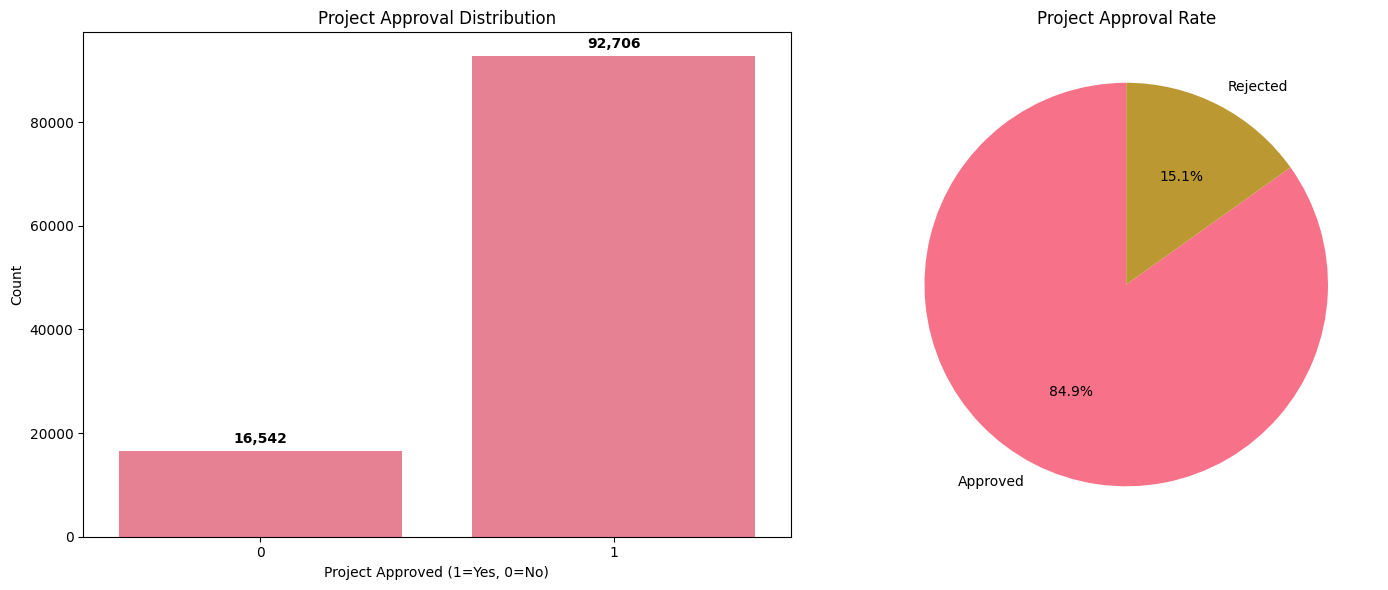

Approval Rate: 84.86%
Rejection Rate: 15.14%


In [ ]:
# Target variable distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
approval_counts = df['project_is_approved'].value_counts()
sns.countplot(data=df, x='project_is_approved', ax=ax1)
ax1.set_title('Project Approval Distribution')
ax1.set_xlabel('Project Approved (1=Yes, 0=No)')
ax1.set_ylabel('Count')

# Add count labels on bars
for value, count in approval_counts.items():
    ax1.text(value, count + 1000, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
# Get the actual labels based on the data
labels = ['Approved' if i == 1 else 'Rejected' for i in approval_counts.index]
ax2.pie(approval_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Project Approval Rate')

plt.tight_layout()
plt.show()

print(f"Approval Rate: {df['project_is_approved'].mean()*100:.2f}%")
print(f"Rejection Rate: {(1 - df['project_is_approved'].mean())*100:.2f}%")

## 4. Categorical Features Analysis

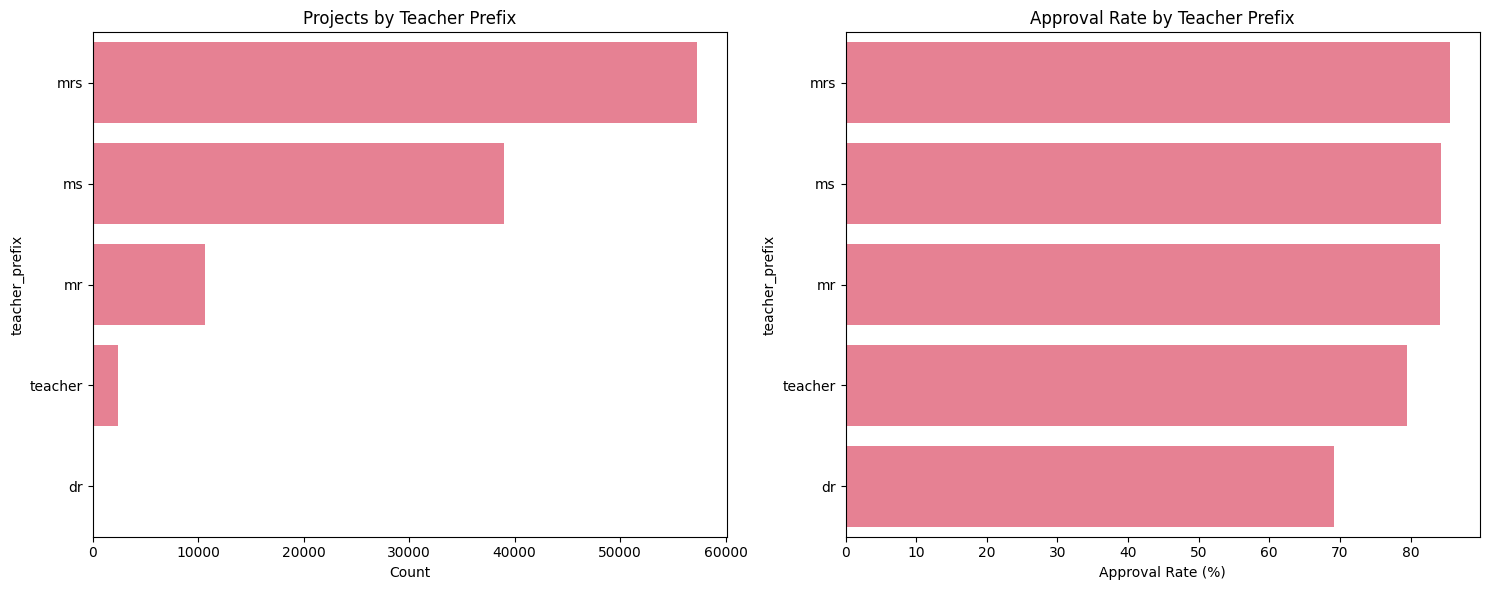


Approval rates by teacher prefix:
                count  approval_rate
teacher_prefix                      
mrs             57272          85.56
ms              38955          84.35
mr              10648          84.15
teacher          2360          79.53
dr                 13          69.23


In [8]:
# Teacher prefix analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count by teacher prefix
prefix_counts = df['teacher_prefix'].value_counts()
sns.countplot(data=df, y='teacher_prefix', order=prefix_counts.index, ax=ax1)
ax1.set_title('Projects by Teacher Prefix')
ax1.set_xlabel('Count')

# Approval rate by teacher prefix
prefix_approval = df.groupby('teacher_prefix')['project_is_approved'].agg(['count', 'mean']).sort_values('count', ascending=False)
prefix_approval['approval_rate'] = prefix_approval['mean'] * 100

sns.barplot(data=prefix_approval.reset_index(), x='approval_rate', y='teacher_prefix', ax=ax2)
ax2.set_title('Approval Rate by Teacher Prefix')
ax2.set_xlabel('Approval Rate (%)')

plt.tight_layout()
plt.show()

print("\nApproval rates by teacher prefix:")
print(prefix_approval[['count', 'approval_rate']].round(2))

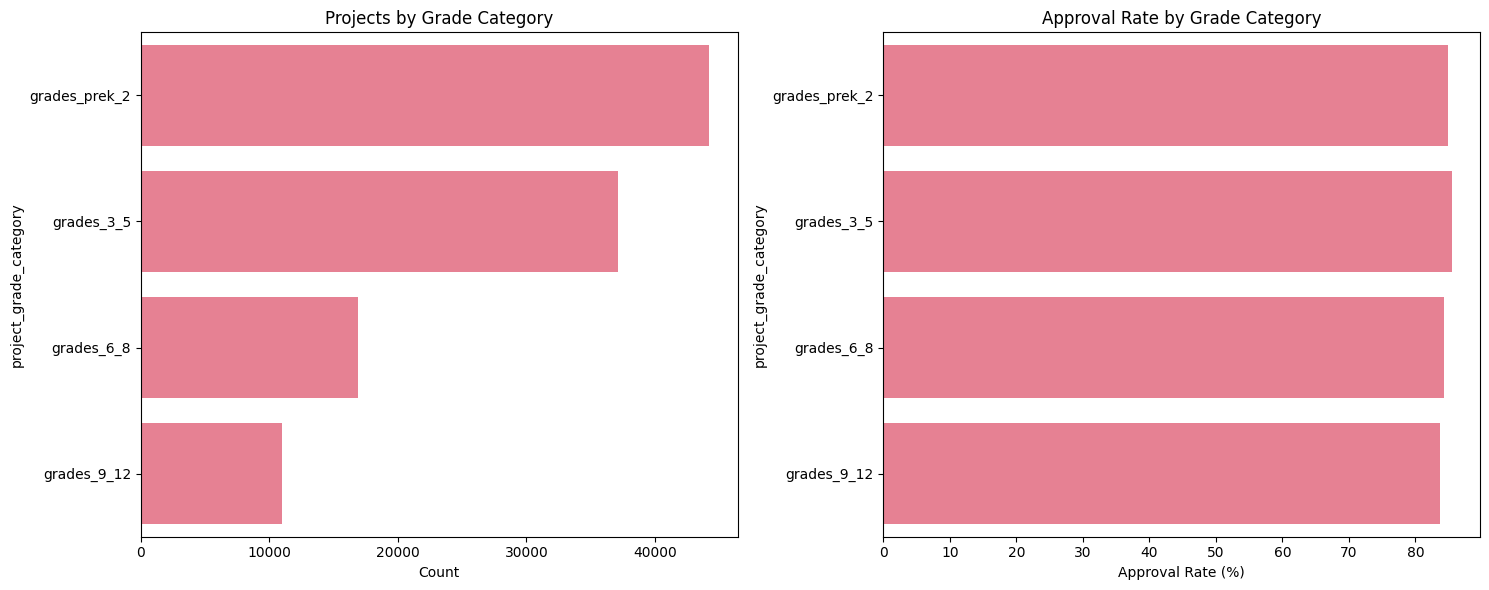


Approval rates by grade category:
                        count  approval_rate
project_grade_category                      
grades_prek_2           44225          84.88
grades_3_5              37137          85.44
grades_6_8              16923          84.25
grades_9_12             10963          83.76


In [9]:
# Project grade category analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count by grade category
grade_counts = df['project_grade_category'].value_counts()
sns.countplot(data=df, y='project_grade_category', order=grade_counts.index, ax=ax1)
ax1.set_title('Projects by Grade Category')
ax1.set_xlabel('Count')

# Approval rate by grade category
grade_approval = df.groupby('project_grade_category')['project_is_approved'].agg(['count', 'mean']).sort_values('count', ascending=False)
grade_approval['approval_rate'] = grade_approval['mean'] * 100

sns.barplot(data=grade_approval.reset_index(), x='approval_rate', y='project_grade_category', ax=ax2)
ax2.set_title('Approval Rate by Grade Category')
ax2.set_xlabel('Approval Rate (%)')

plt.tight_layout()
plt.show()

print("\nApproval rates by grade category:")
print(grade_approval[['count', 'approval_rate']].round(2))

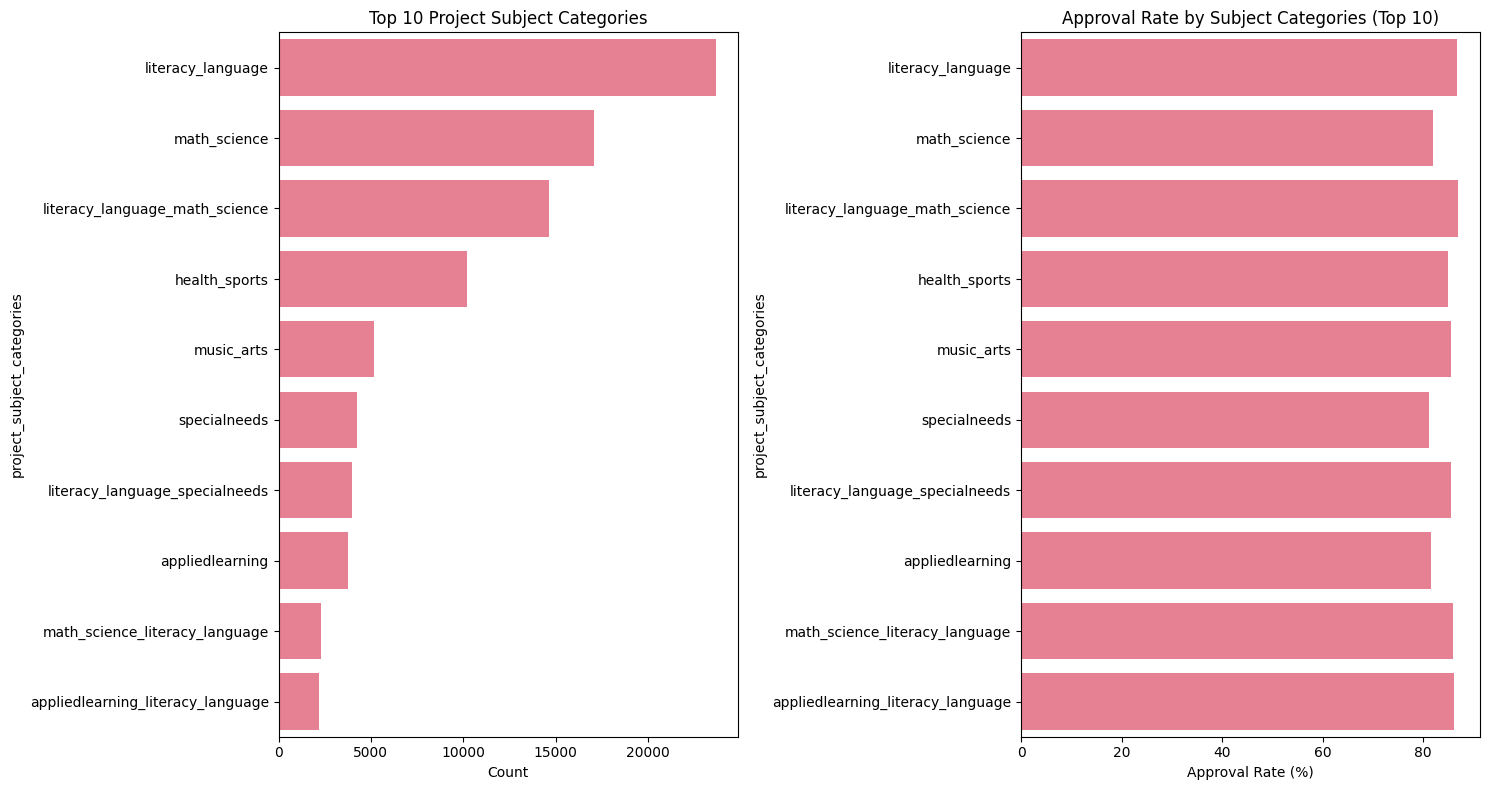


Approval rates by subject categories (top 10):
                                   count  approval_rate
project_subject_categories                             
literacy_language                  23655          86.75
math_science                       17072          81.95
literacy_language_math_science     14636          86.94
health_sports                      10177          84.90
music_arts                          5180          85.50
specialneeds                        4226          81.19
literacy_language_specialneeds      3961          85.56
appliedlearning                     3771          81.46
math_science_literacy_language      2289          85.98
appliedlearning_literacy_language   2191          86.13


In [10]:
# Project subject categories analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Count by subject categories (top 10)
subject_counts = df['project_subject_categories'].value_counts().head(10)
sns.countplot(data=df[df['project_subject_categories'].isin(subject_counts.index)], 
              y='project_subject_categories', order=subject_counts.index, ax=ax1)
ax1.set_title('Top 10 Project Subject Categories')
ax1.set_xlabel('Count')

# Approval rate by subject categories (top 10 by count)
subject_approval = df.groupby('project_subject_categories')['project_is_approved'].agg(['count', 'mean']).sort_values('count', ascending=False).head(10)
subject_approval['approval_rate'] = subject_approval['mean'] * 100

sns.barplot(data=subject_approval.reset_index(), x='approval_rate', y='project_subject_categories', ax=ax2)
ax2.set_title('Approval Rate by Subject Categories (Top 10)')
ax2.set_xlabel('Approval Rate (%)')

plt.tight_layout()
plt.show()

print("\nApproval rates by subject categories (top 10):")
print(subject_approval[['count', 'approval_rate']].round(2))

## 5. Geographic Analysis

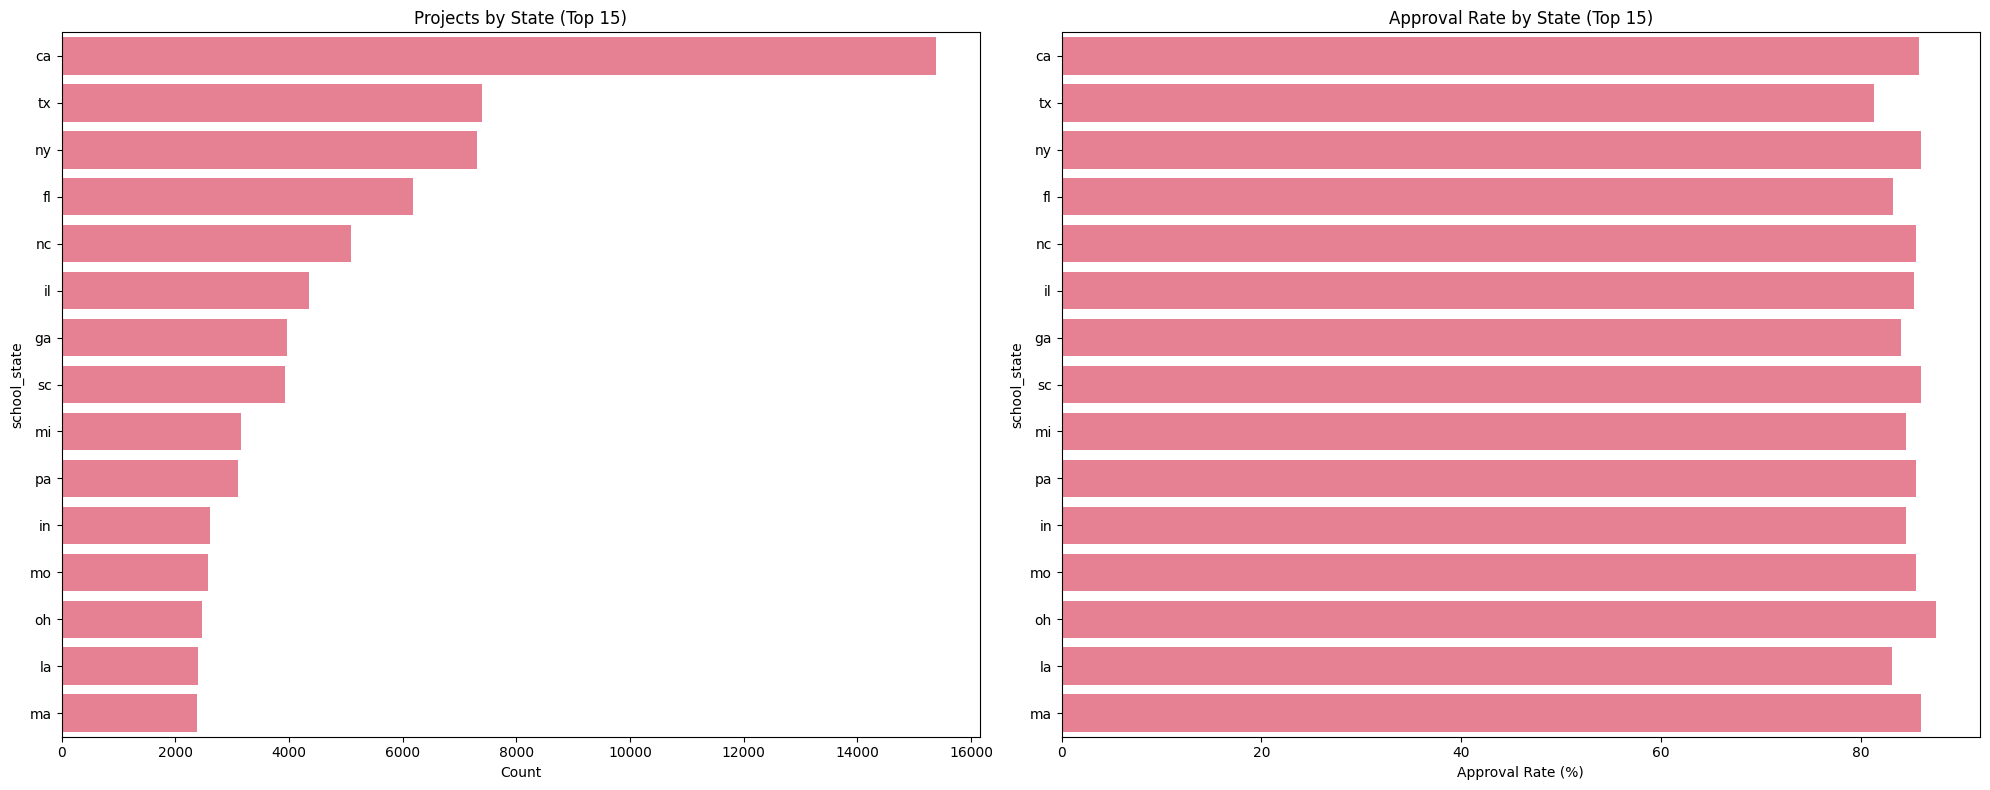


Approval rates by state (top 15):
              count  approval_rate
school_state                      
ca            15388          85.81
tx             7396          81.31
ny             7318          85.97
fl             6185          83.17
nc             5091          85.50
il             4350          85.29
ga             3963          84.00
sc             3936          86.00
mi             3161          84.53
pa             3109          85.49
in             2620          84.50
mo             2576          85.48
oh             2467          87.52
la             2394          83.12
ma             2389          86.02


In [11]:
# School state analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Count by state (top 15)
state_counts = df['school_state'].value_counts().head(15)
sns.countplot(data=df[df['school_state'].isin(state_counts.index)], 
              y='school_state', order=state_counts.index, ax=ax1)
ax1.set_title('Projects by State (Top 15)')
ax1.set_xlabel('Count')

# Approval rate by state (top 15 by count)
state_approval = df.groupby('school_state')['project_is_approved'].agg(['count', 'mean']).sort_values('count', ascending=False).head(15)
state_approval['approval_rate'] = state_approval['mean'] * 100

sns.barplot(data=state_approval.reset_index(), x='approval_rate', y='school_state', ax=ax2)
ax2.set_title('Approval Rate by State (Top 15)')
ax2.set_xlabel('Approval Rate (%)')

plt.tight_layout()
plt.show()

print("\nApproval rates by state (top 15):")
print(state_approval[['count', 'approval_rate']].round(2))

## 6. Numerical Features Analysis

Price statistics by approval status:
                       mean  median     std  count
project_is_approved                               
0                    359.95  263.14  381.06  16542
1                    287.09  198.99  363.92  92706


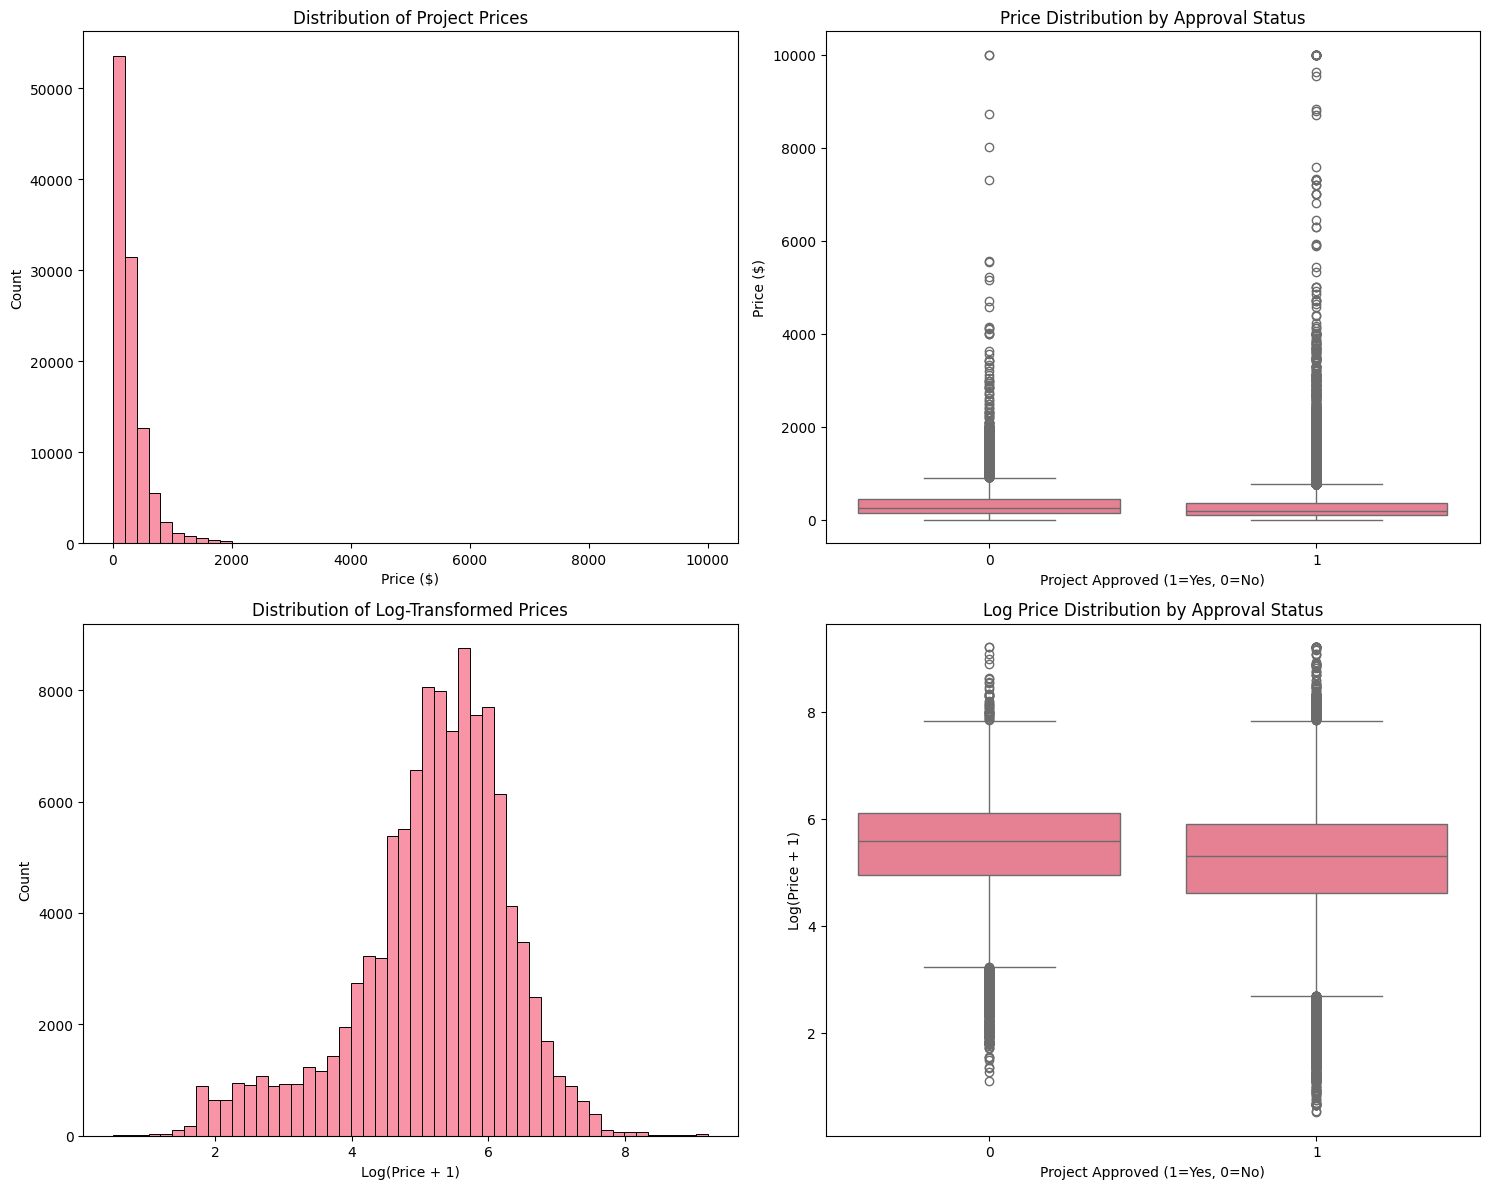

In [12]:
# Price analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Price distribution
sns.histplot(data=df, x='price', bins=50, ax=ax1)
ax1.set_title('Distribution of Project Prices')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Count')

# Price by approval status
sns.boxplot(data=df, x='project_is_approved', y='price', ax=ax2)
ax2.set_title('Price Distribution by Approval Status')
ax2.set_xlabel('Project Approved (1=Yes, 0=No)')
ax2.set_ylabel('Price ($)')

# Price statistics by approval
price_stats = df.groupby('project_is_approved')['price'].agg(['mean', 'median', 'std', 'count'])
print("Price statistics by approval status:")
print(price_stats.round(2))

# Log price distribution (to handle outliers)
df['log_price'] = np.log1p(df['price'])
sns.histplot(data=df, x='log_price', bins=50, ax=ax3)
ax3.set_title('Distribution of Log-Transformed Prices')
ax3.set_xlabel('Log(Price + 1)')
ax3.set_ylabel('Count')

# Log price by approval status
sns.boxplot(data=df, x='project_is_approved', y='log_price', ax=ax4)
ax4.set_title('Log Price Distribution by Approval Status')
ax4.set_xlabel('Project Approved (1=Yes, 0=No)')
ax4.set_ylabel('Log(Price + 1)')

plt.tight_layout()
plt.show()

Quantity statistics by approval status:
                      mean  median    std  count
project_is_approved                             
0                    20.19    12.0  29.06  16542
1                    16.39     8.0  25.59  92706


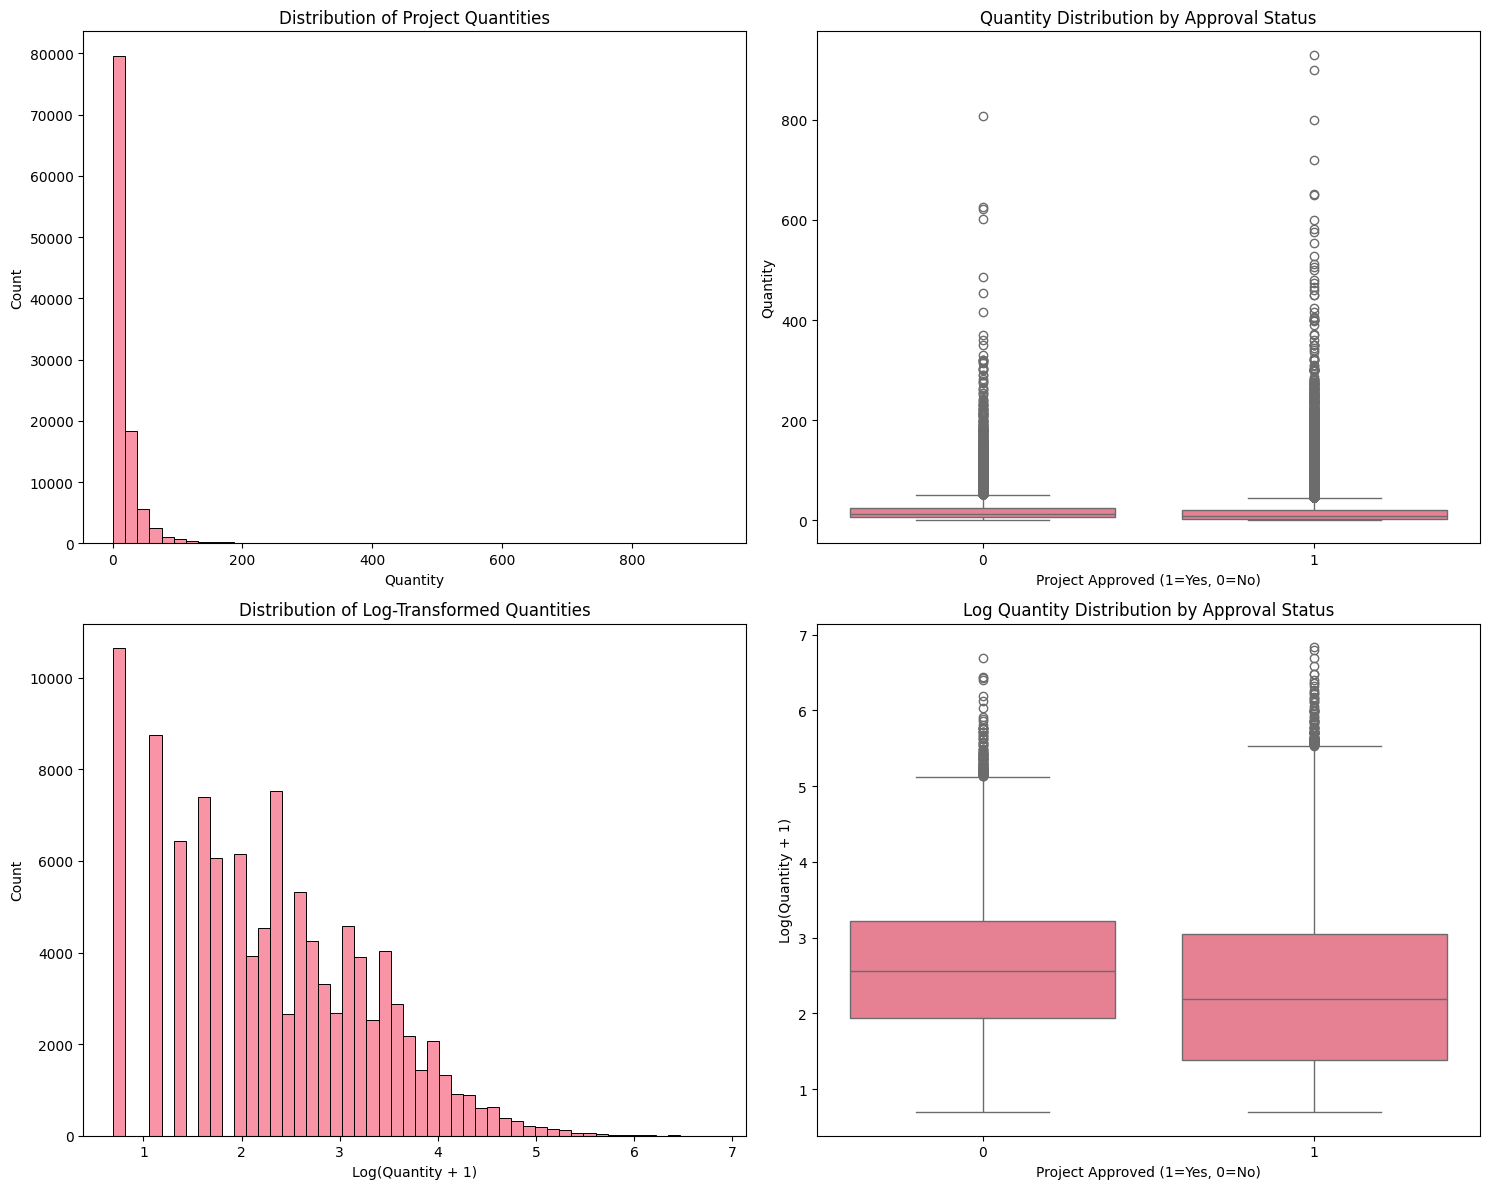

In [13]:
# Quantity analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Quantity distribution
sns.histplot(data=df, x='quantity', bins=50, ax=ax1)
ax1.set_title('Distribution of Project Quantities')
ax1.set_xlabel('Quantity')
ax1.set_ylabel('Count')

# Quantity by approval status
sns.boxplot(data=df, x='project_is_approved', y='quantity', ax=ax2)
ax2.set_title('Quantity Distribution by Approval Status')
ax2.set_xlabel('Project Approved (1=Yes, 0=No)')
ax2.set_ylabel('Quantity')

# Quantity statistics by approval
quantity_stats = df.groupby('project_is_approved')['quantity'].agg(['mean', 'median', 'std', 'count'])
print("Quantity statistics by approval status:")
print(quantity_stats.round(2))

# Log quantity distribution
df['log_quantity'] = np.log1p(df['quantity'])
sns.histplot(data=df, x='log_quantity', bins=50, ax=ax3)
ax3.set_title('Distribution of Log-Transformed Quantities')
ax3.set_xlabel('Log(Quantity + 1)')
ax3.set_ylabel('Count')

# Log quantity by approval status
sns.boxplot(data=df, x='project_is_approved', y='log_quantity', ax=ax4)
ax4.set_title('Log Quantity Distribution by Approval Status')
ax4.set_xlabel('Project Approved (1=Yes, 0=No)')
ax4.set_ylabel('Log(Quantity + 1)')

plt.tight_layout()
plt.show()

Teacher experience statistics by approval status:
                      mean  median    std  count
project_is_approved                             
0                     6.89     2.0  17.49  16542
1                    11.91     2.0  29.17  92706


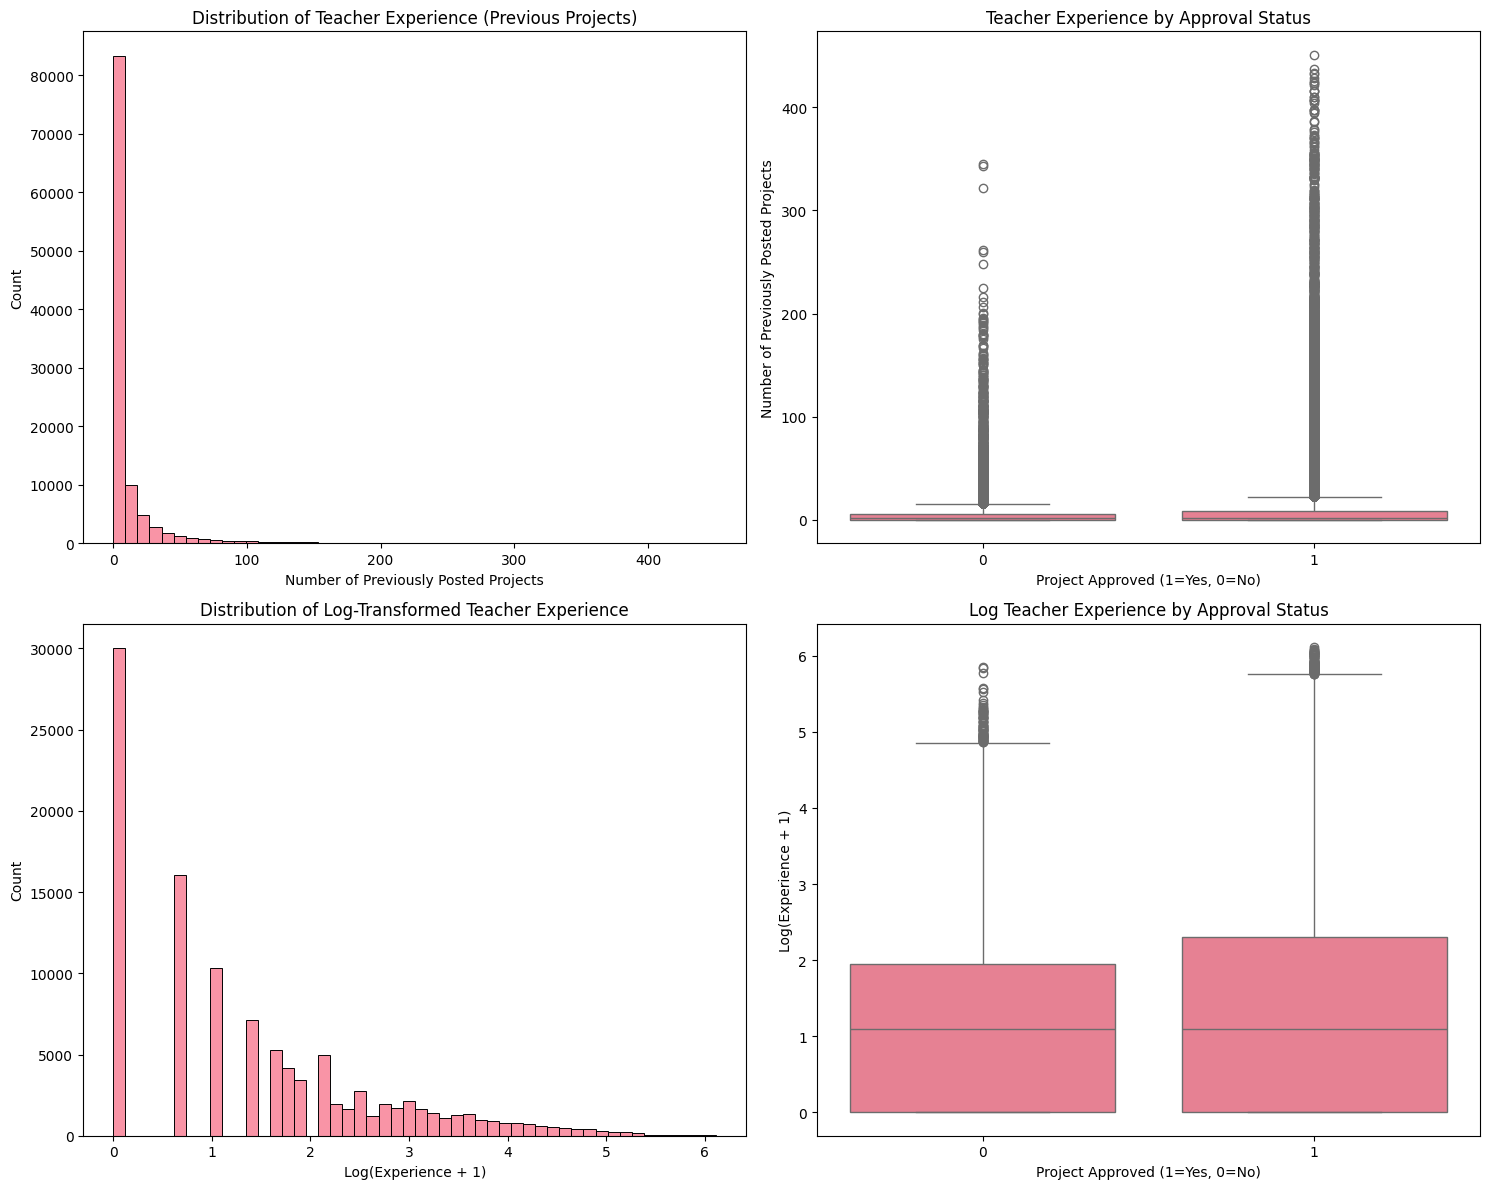

In [14]:
# Teacher experience analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Previous projects distribution
sns.histplot(data=df, x='teacher_number_of_previously_posted_projects', bins=50, ax=ax1)
ax1.set_title('Distribution of Teacher Experience (Previous Projects)')
ax1.set_xlabel('Number of Previously Posted Projects')
ax1.set_ylabel('Count')

# Experience by approval status
sns.boxplot(data=df, x='project_is_approved', y='teacher_number_of_previously_posted_projects', ax=ax2)
ax2.set_title('Teacher Experience by Approval Status')
ax2.set_xlabel('Project Approved (1=Yes, 0=No)')
ax2.set_ylabel('Number of Previously Posted Projects')

# Experience statistics by approval
exp_stats = df.groupby('project_is_approved')['teacher_number_of_previously_posted_projects'].agg(['mean', 'median', 'std', 'count'])
print("Teacher experience statistics by approval status:")
print(exp_stats.round(2))

# Log experience distribution
df['log_experience'] = np.log1p(df['teacher_number_of_previously_posted_projects'])
sns.histplot(data=df, x='log_experience', bins=50, ax=ax3)
ax3.set_title('Distribution of Log-Transformed Teacher Experience')
ax3.set_xlabel('Log(Experience + 1)')
ax3.set_ylabel('Count')

# Log experience by approval status
sns.boxplot(data=df, x='project_is_approved', y='log_experience', ax=ax4)
ax4.set_title('Log Teacher Experience by Approval Status')
ax4.set_xlabel('Project Approved (1=Yes, 0=No)')
ax4.set_ylabel('Log(Experience + 1)')

plt.tight_layout()
plt.show()

## 7. Text Features Analysis

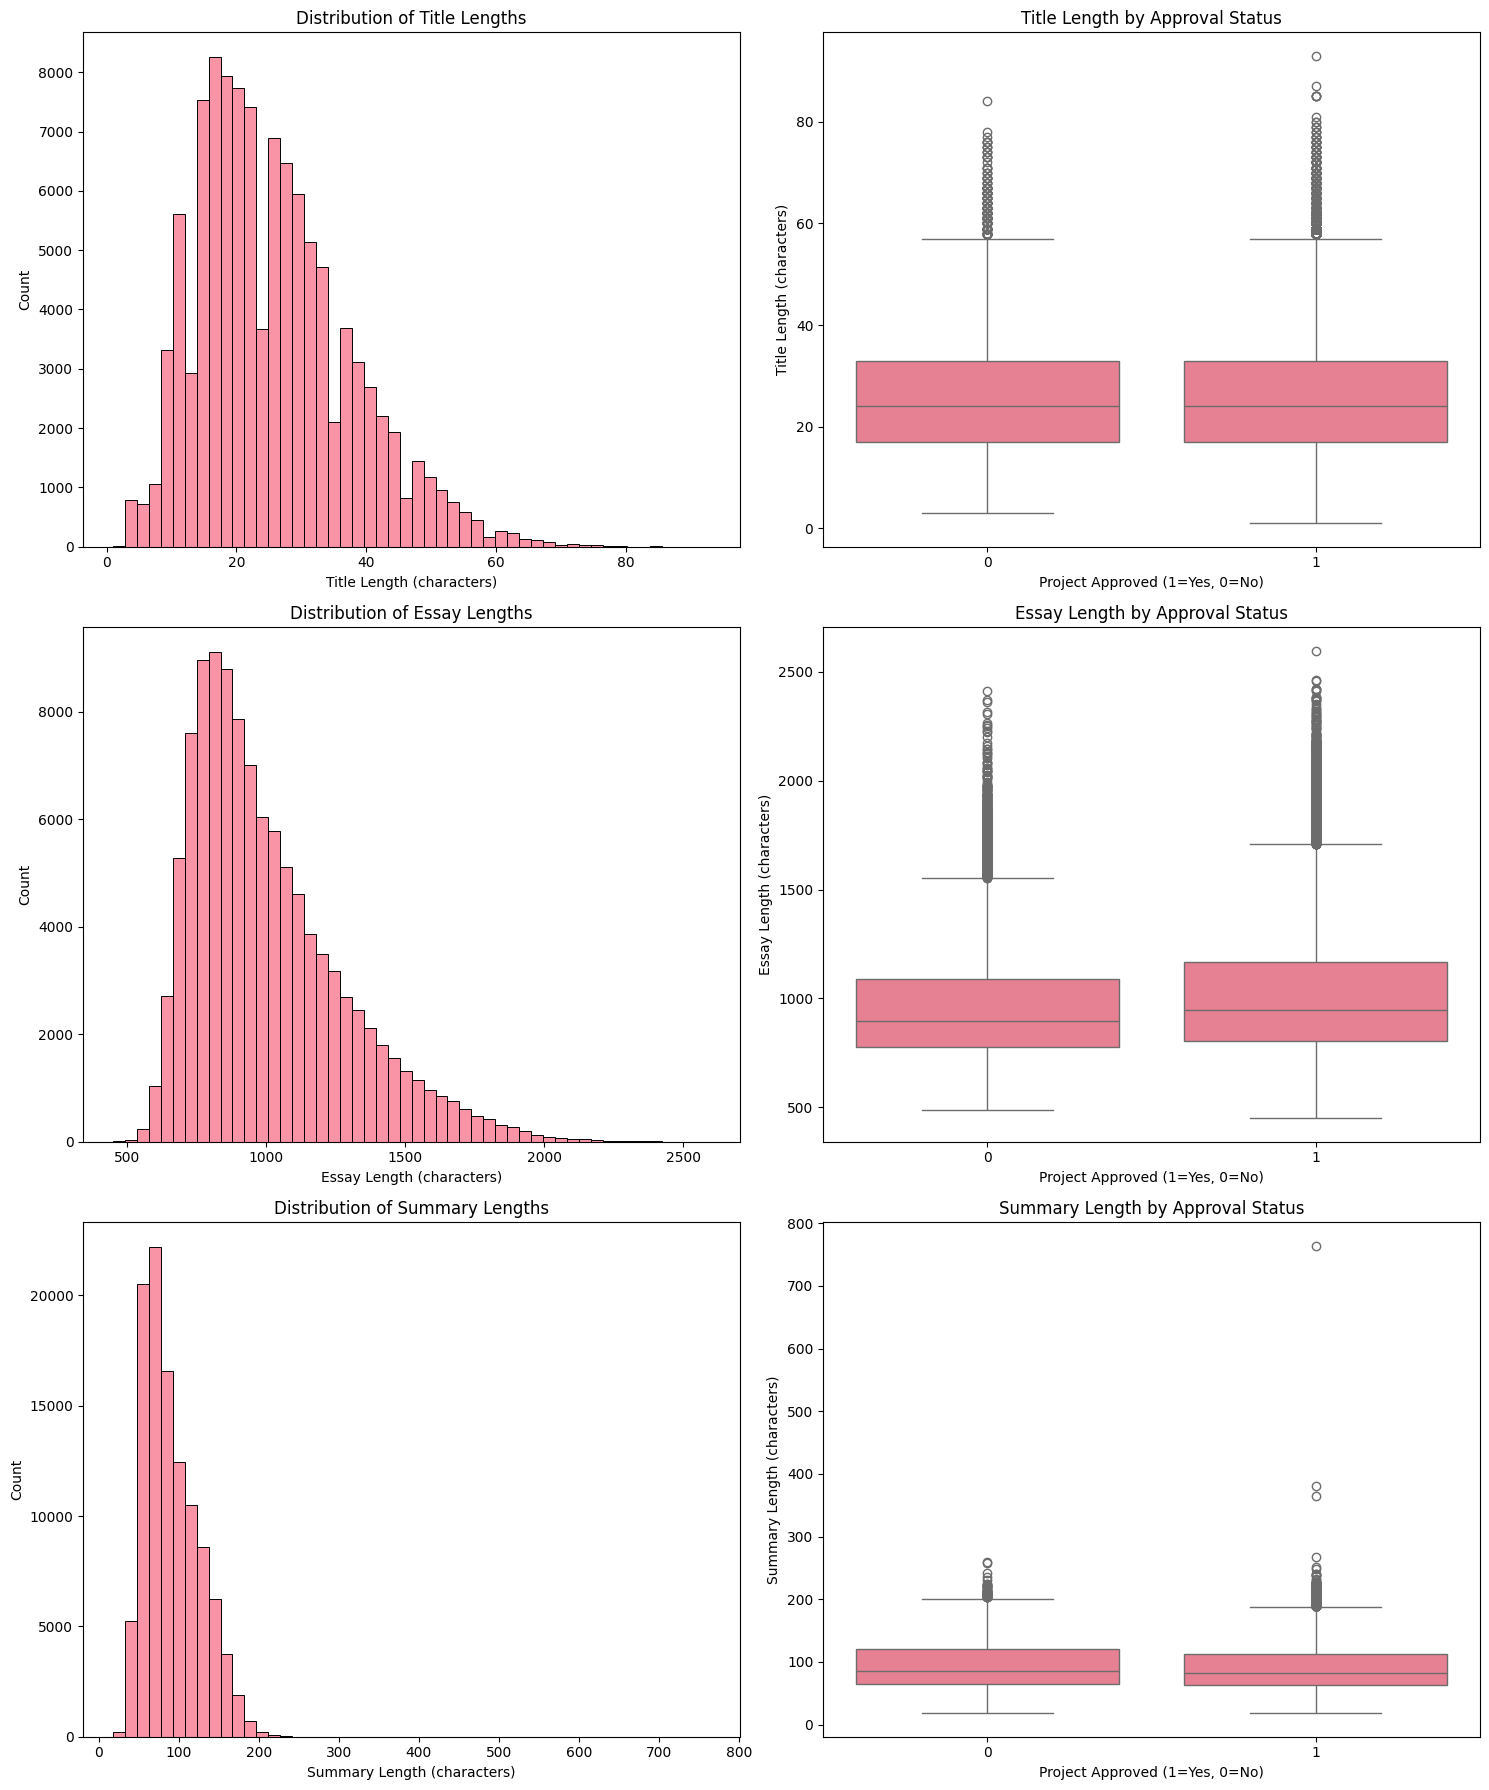

Text length statistics by approval status:
                    title_length               essay_length                summary_length              
                            mean median    std         mean median     std           mean median    std
project_is_approved                                                                                    
0                          25.61   24.0  11.85       961.86  897.0  257.77          94.16   86.0  36.27
1                          25.70   24.0  11.69      1015.11  949.0  278.62          90.17   82.0  34.35


In [15]:
# Text length analysis
df['title_length'] = df['cleaned_titles'].str.len()
df['essay_length'] = df['cleaned_essays'].str.len()
df['summary_length'] = df['cleaned_summary'].str.len()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 18))

# Title length distribution
sns.histplot(data=df, x='title_length', bins=50, ax=ax1)
ax1.set_title('Distribution of Title Lengths')
ax1.set_xlabel('Title Length (characters)')
ax1.set_ylabel('Count')

# Title length by approval
sns.boxplot(data=df, x='project_is_approved', y='title_length', ax=ax2)
ax2.set_title('Title Length by Approval Status')
ax2.set_xlabel('Project Approved (1=Yes, 0=No)')
ax2.set_ylabel('Title Length (characters)')

# Essay length distribution
sns.histplot(data=df, x='essay_length', bins=50, ax=ax3)
ax3.set_title('Distribution of Essay Lengths')
ax3.set_xlabel('Essay Length (characters)')
ax3.set_ylabel('Count')

# Essay length by approval
sns.boxplot(data=df, x='project_is_approved', y='essay_length', ax=ax4)
ax4.set_title('Essay Length by Approval Status')
ax4.set_xlabel('Project Approved (1=Yes, 0=No)')
ax4.set_ylabel('Essay Length (characters)')

# Summary length distribution
sns.histplot(data=df, x='summary_length', bins=50, ax=ax5)
ax5.set_title('Distribution of Summary Lengths')
ax5.set_xlabel('Summary Length (characters)')
ax5.set_ylabel('Count')

# Summary length by approval
sns.boxplot(data=df, x='project_is_approved', y='summary_length', ax=ax6)
ax6.set_title('Summary Length by Approval Status')
ax6.set_xlabel('Project Approved (1=Yes, 0=No)')
ax6.set_ylabel('Summary Length (characters)')

plt.tight_layout()
plt.show()

# Text length statistics
text_stats = df.groupby('project_is_approved')[['title_length', 'essay_length', 'summary_length']].agg(['mean', 'median', 'std'])
print("Text length statistics by approval status:")
print(text_stats.round(2))

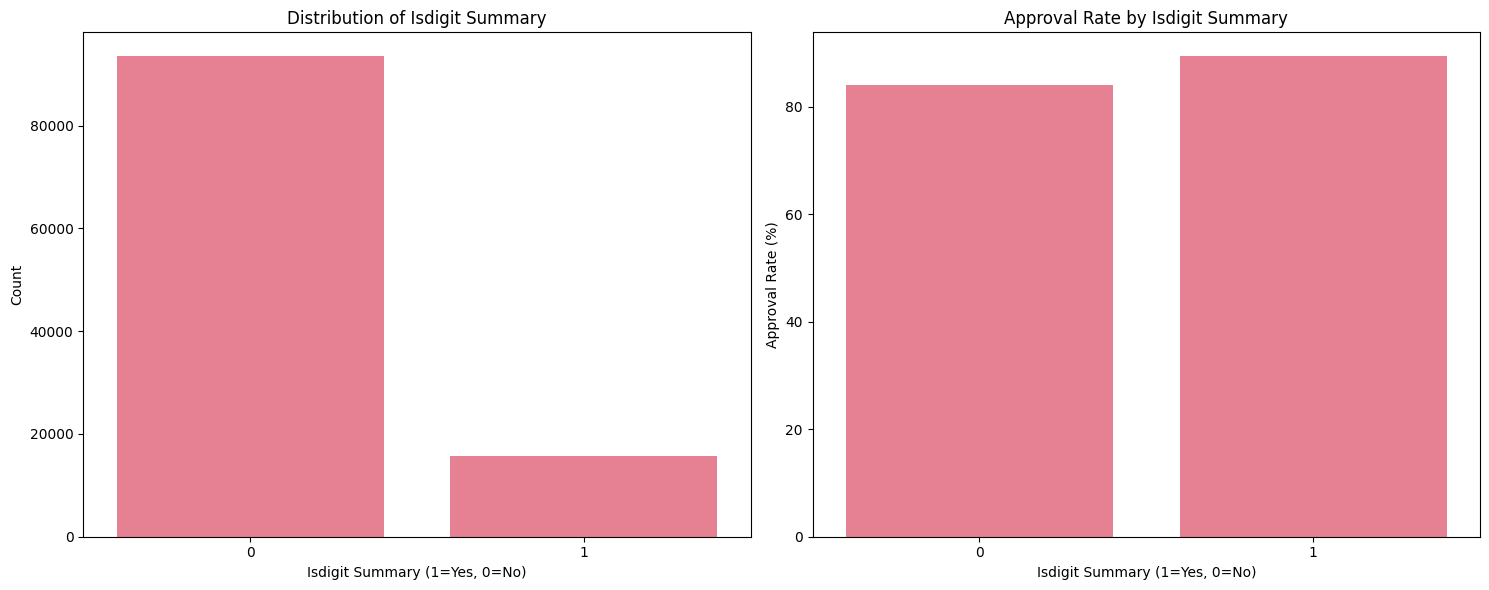


Approval rates by isdigit summary:
                 count  approval_rate
isdigit_summary                      
0                93492          84.09
1                15756          89.43


In [16]:
# Isdigit summary analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Isdigit summary distribution
sns.countplot(data=df, x='isdigit_summary', ax=ax1)
ax1.set_title('Distribution of Isdigit Summary')
ax1.set_xlabel('Isdigit Summary (1=Yes, 0=No)')
ax1.set_ylabel('Count')

# Isdigit summary by approval
isdigit_approval = df.groupby('isdigit_summary')['project_is_approved'].agg(['count', 'mean'])
isdigit_approval['approval_rate'] = isdigit_approval['mean'] * 100

sns.barplot(data=isdigit_approval.reset_index(), x='isdigit_summary', y='approval_rate', ax=ax2)
ax2.set_title('Approval Rate by Isdigit Summary')
ax2.set_xlabel('Isdigit Summary (1=Yes, 0=No)')
ax2.set_ylabel('Approval Rate (%)')

plt.tight_layout()
plt.show()

print("\nApproval rates by isdigit summary:")
print(isdigit_approval[['count', 'approval_rate']].round(2))

## 8. Correlation Analysis

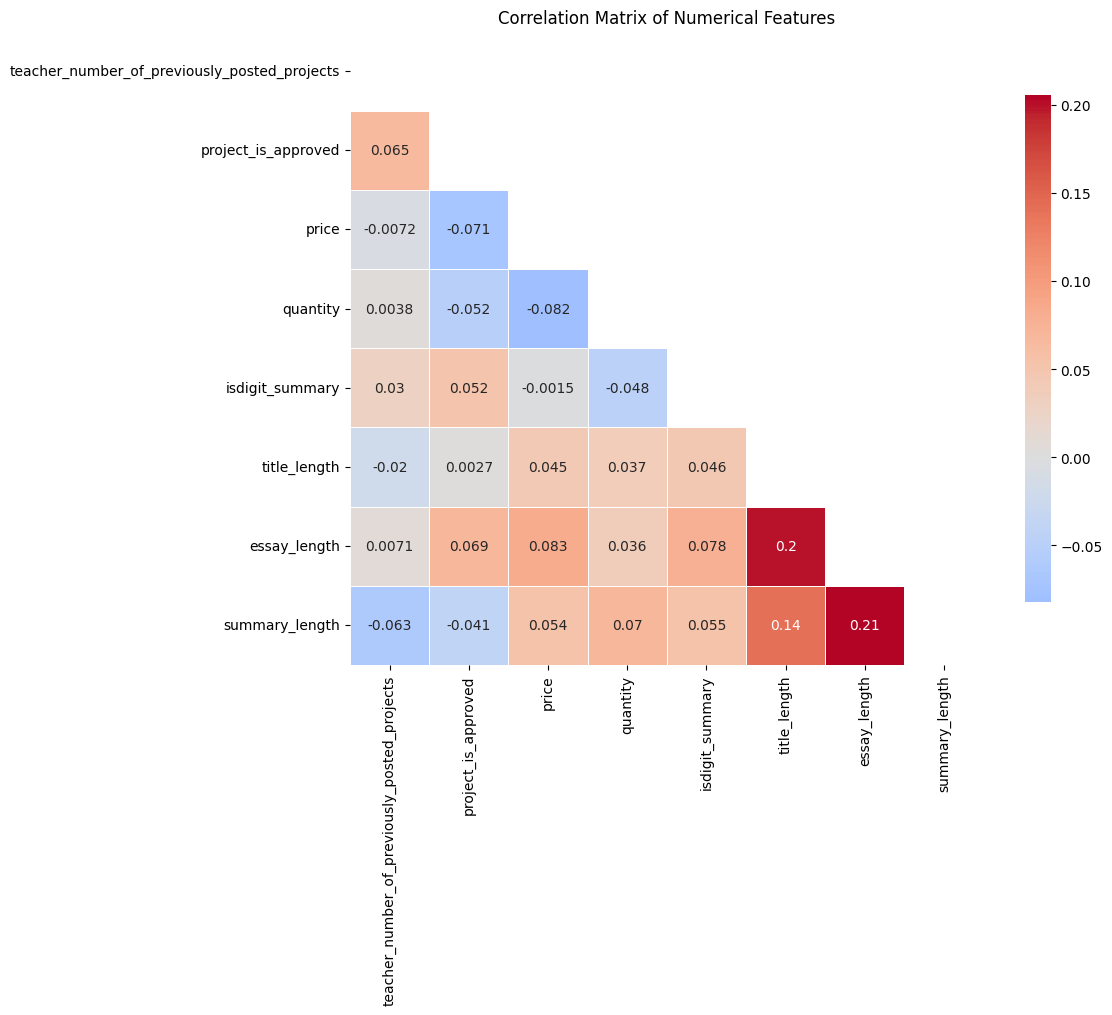


Correlations with project approval:
project_is_approved                             1.000000
essay_length                                    0.069102
teacher_number_of_previously_posted_projects    0.064854
isdigit_summary                                 0.052315
title_length                                    0.002656
summary_length                                 -0.041229
quantity                                       -0.052024
price                                          -0.071069
Name: project_is_approved, dtype: float64


In [17]:
# Select numerical columns for correlation analysis
numerical_cols = ['teacher_number_of_previously_posted_projects', 'project_is_approved', 
                  'price', 'quantity', 'isdigit_summary', 'title_length', 'essay_length', 'summary_length']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_correlations = correlation_matrix['project_is_approved'].sort_values(ascending=False)
print("\nCorrelations with project approval:")
print(target_correlations)

## 9. Feature Engineering Insights

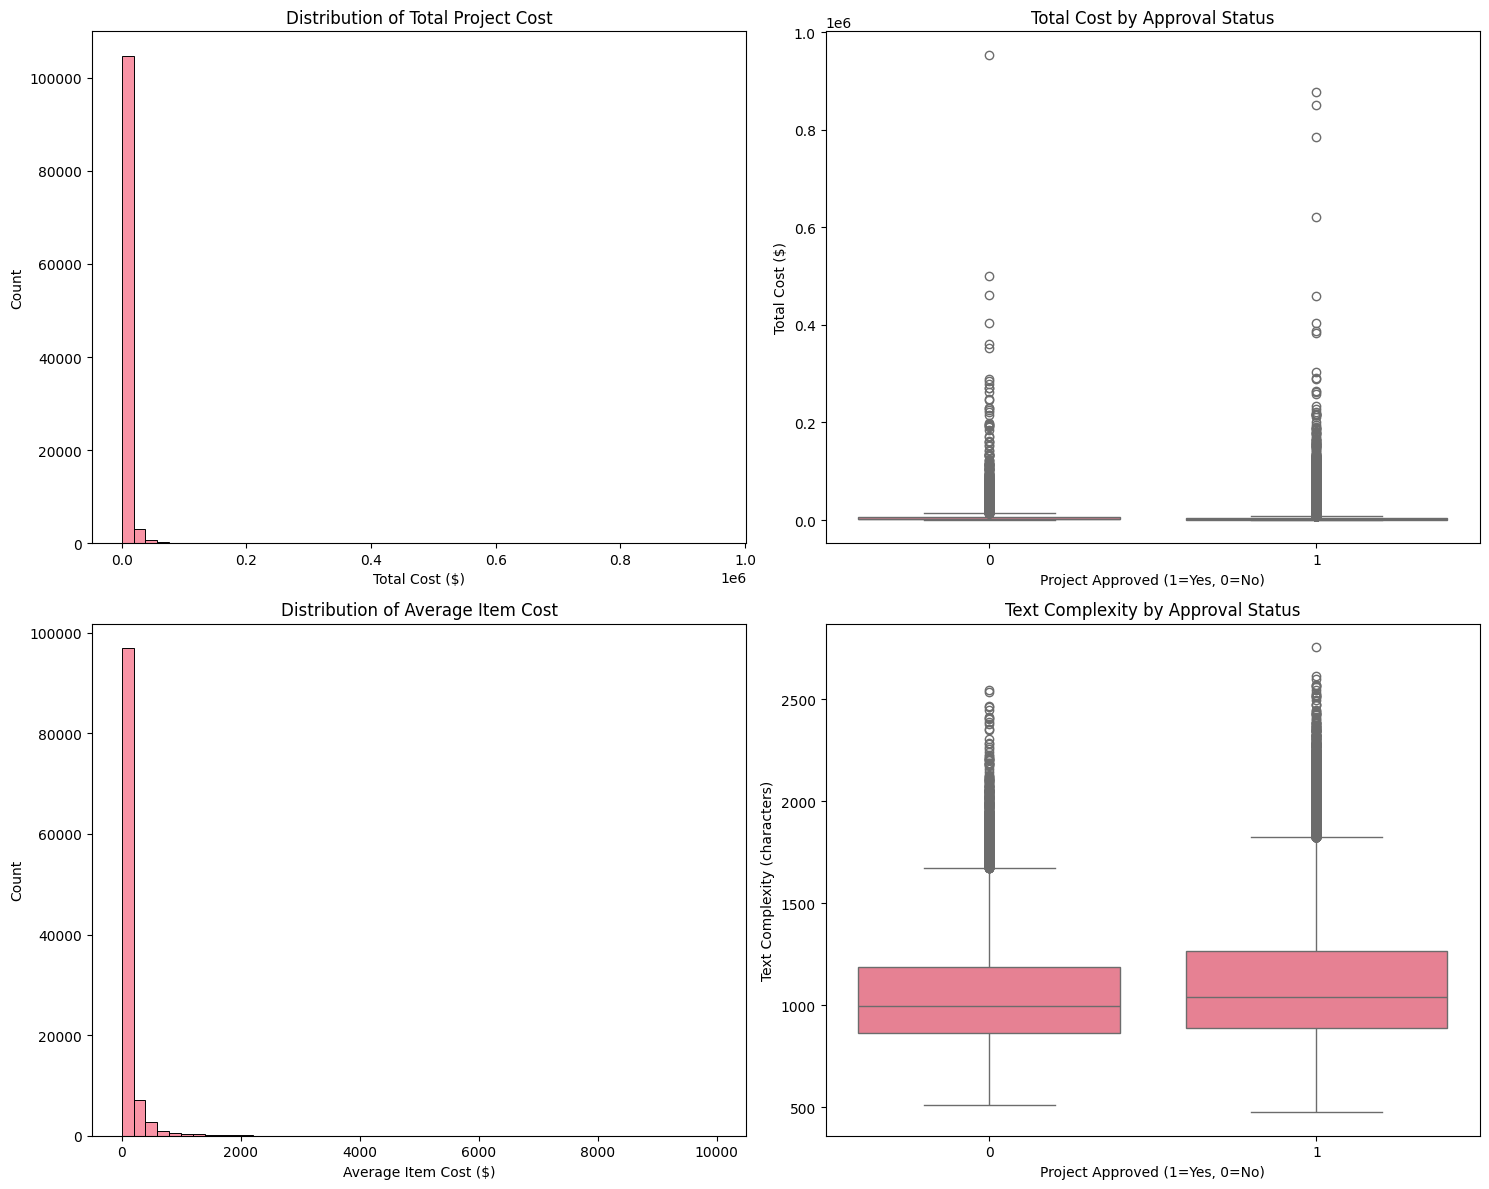

Derived feature statistics by approval status:
                    total_cost                    avg_item_cost                text_complexity                
                          mean   median       std          mean median     std            mean  median     std
project_is_approved                                                                                           
0                      7035.85  2659.34  17672.23         66.98   21.6  203.33         1056.02   994.0  266.74
1                      3776.52  1206.00  10891.37         95.75   23.6  277.98         1105.28  1039.0  287.94


In [18]:
# Create some derived features
df['total_cost'] = df['price'] * df['quantity']
df['avg_item_cost'] = df['price'] / df['quantity']
df['text_complexity'] = df['essay_length'] + df['summary_length']

# Analyze derived features
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Total cost distribution
sns.histplot(data=df, x='total_cost', bins=50, ax=ax1)
ax1.set_title('Distribution of Total Project Cost')
ax1.set_xlabel('Total Cost ($)')
ax1.set_ylabel('Count')

# Total cost by approval
sns.boxplot(data=df, x='project_is_approved', y='total_cost', ax=ax2)
ax2.set_title('Total Cost by Approval Status')
ax2.set_xlabel('Project Approved (1=Yes, 0=No)')
ax2.set_ylabel('Total Cost ($)')

# Average item cost distribution
sns.histplot(data=df, x='avg_item_cost', bins=50, ax=ax3)
ax3.set_title('Distribution of Average Item Cost')
ax3.set_xlabel('Average Item Cost ($)')
ax3.set_ylabel('Count')

# Text complexity by approval
sns.boxplot(data=df, x='project_is_approved', y='text_complexity', ax=ax4)
ax4.set_title('Text Complexity by Approval Status')
ax4.set_xlabel('Project Approved (1=Yes, 0=No)')
ax4.set_ylabel('Text Complexity (characters)')

plt.tight_layout()
plt.show()

# Derived feature statistics
derived_stats = df.groupby('project_is_approved')[['total_cost', 'avg_item_cost', 'text_complexity']].agg(['mean', 'median', 'std'])
print("Derived feature statistics by approval status:")
print(derived_stats.round(2))

## 10. Summary and Key Insights

In [19]:
# Summary statistics
print("=== KEY INSIGHTS SUMMARY ===\n")

print("1. DATASET OVERVIEW:")
print(f"   - Total projects: {len(df):,}")
print(f"   - Overall approval rate: {df['project_is_approved'].mean()*100:.2f}%")
print(f"   - Date range: {df.shape[0]} projects")

print("\n2. APPROVAL PATTERNS:")
print(f"   - Approved projects: {df['project_is_approved'].sum():,}")
print(f"   - Rejected projects: {(df['project_is_approved'] == 0).sum():,}")

print("\n3. TOP STATES BY PROJECT COUNT:")
top_states = df['school_state'].value_counts().head(5)
for state, count in top_states.items():
    approval_rate = df[df['school_state'] == state]['project_is_approved'].mean() * 100
    print(f"   - {state}: {count:,} projects ({approval_rate:.1f}% approval rate)")

print("\n4. TOP SUBJECT CATEGORIES:")
top_subjects = df['project_subject_categories'].value_counts().head(5)
for subject, count in top_subjects.items():
    approval_rate = df[df['project_subject_categories'] == subject]['project_is_approved'].mean() * 100
    print(f"   - {subject}: {count:,} projects ({approval_rate:.1f}% approval rate)")

print("\n5. COST ANALYSIS:")
print(f"   - Average project cost: ${df['price'].mean():.2f}")
print(f"   - Median project cost: ${df['price'].median():.2f}")
print(f"   - Cost range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")

print("\n6. TEACHER EXPERIENCE:")
print(f"   - Average teacher experience: {df['teacher_number_of_previously_posted_projects'].mean():.1f} previous projects")
print(f"   - Median teacher experience: {df['teacher_number_of_previously_posted_projects'].median():.1f} previous projects")

print("\n7. TEXT FEATURES:")
print(f"   - Average title length: {df['title_length'].mean():.0f} characters")
print(f"   - Average essay length: {df['essay_length'].mean():.0f} characters")
print(f"   - Average summary length: {df['summary_length'].mean():.0f} characters")

=== KEY INSIGHTS SUMMARY ===

1. DATASET OVERVIEW:
   - Total projects: 109,248
   - Overall approval rate: 84.86%
   - Date range: 109248 projects

2. APPROVAL PATTERNS:
   - Approved projects: 92,706
   - Rejected projects: 16,542

3. TOP STATES BY PROJECT COUNT:
   - ca: 15,388 projects (85.8% approval rate)
   - tx: 7,396 projects (81.3% approval rate)
   - ny: 7,318 projects (86.0% approval rate)
   - fl: 6,185 projects (83.2% approval rate)
   - nc: 5,091 projects (85.5% approval rate)

4. TOP SUBJECT CATEGORIES:
   - literacy_language: 23,655 projects (86.7% approval rate)
   - math_science: 17,072 projects (82.0% approval rate)
   - literacy_language_math_science: 14,636 projects (86.9% approval rate)
   - health_sports: 10,177 projects (84.9% approval rate)
   - music_arts: 5,180 projects (85.5% approval rate)

5. COST ANALYSIS:
   - Average project cost: $298.12
   - Median project cost: $206.22
   - Cost range: $0.66 - $9999.00

6. TEACHER EXPERIENCE:
   - Average teacher ex

## 11. Recommendations for Further Analysis

Based on this EDA, here are some recommendations for further analysis:

1. **Text Analysis**: Perform sentiment analysis on project titles and essays to understand if emotional language affects approval rates.

2. **Temporal Analysis**: If date information is available, analyze how approval rates and project characteristics change over time.

3. **Geographic Clustering**: Group states by region and analyze regional patterns in project requests and approvals.

4. **Feature Engineering**: Create more sophisticated features like:
   - Project complexity score based on multiple factors
   - Teacher success rate (approved projects / total projects)
   - Subject category popularity trends

5. **Machine Learning Models**: Build predictive models to identify factors that most strongly influence project approval.

6. **A/B Testing Analysis**: If this is for A/B testing purposes, analyze how different project characteristics affect success rates.

7. **Outlier Analysis**: Investigate extreme cases (very expensive projects, very experienced teachers, etc.) to understand their impact.

8. **Interactive Visualizations**: Create interactive dashboards using Plotly or Streamlit for deeper exploration.